In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
#from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
df= pd.read_csv(r'C:\Users\andri\Downloads\movies.csv')


In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
df.dropna(how='any',inplace=True)

In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [7]:
#change data type of columns
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df['votes']=df['votes'].astype('int64')

In [8]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [9]:
#setting name as index value
df.set_index('name', inplace=True)
df.head()

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,,,,,,,,,,,,,,
The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [10]:
#check if we have any duplicate rows
duplicaterows=df[df.duplicated()]
duplicaterows

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,,,,,,,,,,,,,,


<AxesSubplot:xlabel='gross', ylabel='budget'>

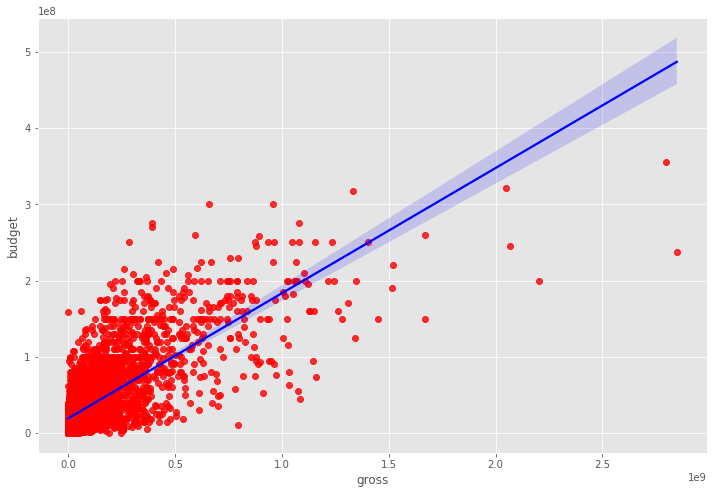

In [11]:
#analyse the relation between budget and gross earings for the particular film
#plotting using seaborn
sns.regplot(x='gross',y='budget', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [12]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [13]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                             year           
"DIA" Productions GmbH & Co. KG     2003   44350926
"Weathering With You" Film Partners 2019  193457467
.406 Production                     1996      10580
1492 Pictures                       1996  129832389
                                    1999   87423861
...                                             ...
erbp                                2013     587174
i am OTHER                          2015   17986781
i5 Films                            2001   10031529
micro_scope                         2010    7099598
thefyzz                             2017   62198461

[2987 rows x 1 columns]

<AxesSubplot:xlabel='rating', ylabel='gross'>

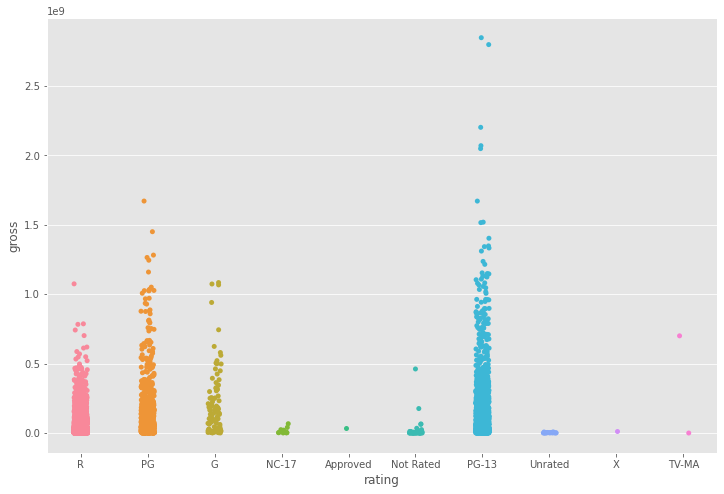

In [14]:
sns.stripplot(x="rating", y="gross", data=df)

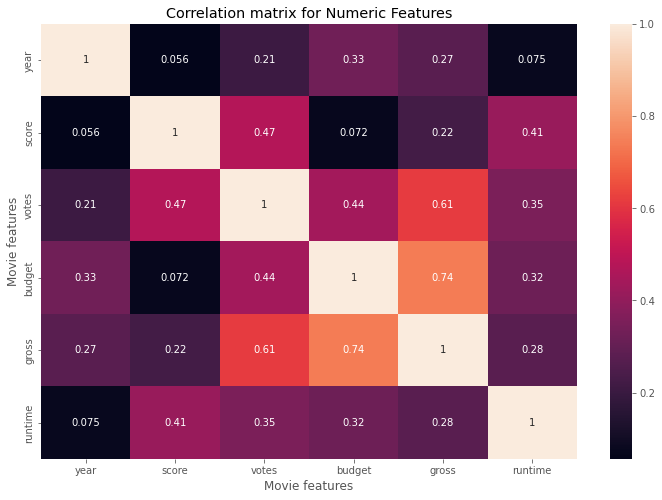

In [15]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [16]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,,,,,,,,,,,,,,
The Shining,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0
The Blue Lagoon,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0
Star Wars: Episode V - The Empire Strikes Back,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0
Airplane!,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0
Caddyshack,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0


In [17]:
df_numerized.corr(method='pearson')

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
rating,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077
released,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975
score,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
writer,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561
star,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108
country,0.008230,-0.009164,-0.066748,-0.017228,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477


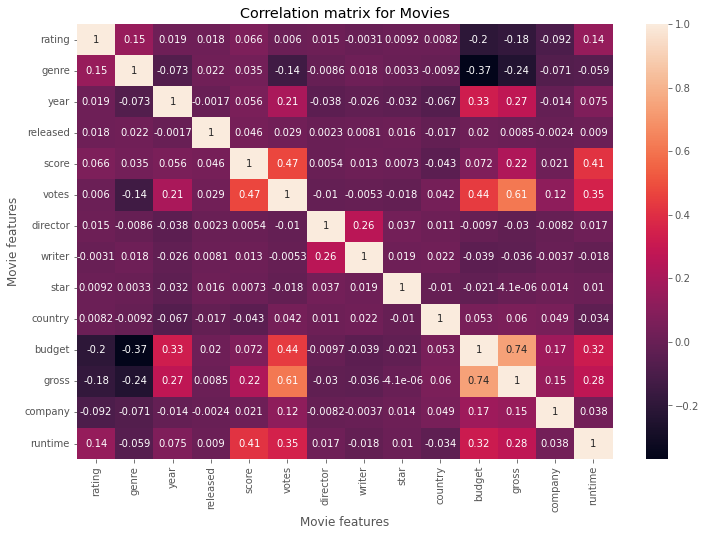

In [18]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [19]:
corr_pairs=correlation_matrix.unstack()
corr_pairs

rating   rating      1.000000
         genre       0.147796
         year        0.019499
         released    0.018083
         score       0.065983
                       ...   
runtime  country    -0.034477
         budget      0.318695
         gross       0.275796
         company     0.037585
         runtime     1.000000
Length: 196, dtype: float64

In [20]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.244101
gross     genre      -0.244101
budget    rating     -0.203946
                        ...   
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
company   company     1.000000
runtime   runtime     1.000000
Length: 196, dtype: float64

In [21]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
strong_pairs

gross     votes       0.614751
votes     gross       0.614751
budget    gross       0.740247
gross     budget      0.740247
rating    rating      1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [22]:
df.head()

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,,,,,,,,,,,,,,
The Shining,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0
The Blue Lagoon,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0
Star Wars: Episode V - The Empire Strikes Back,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0
Airplane!,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0
Caddyshack,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0
